# Student Performance Indicator

### 1) Problem Statement

#### The project summerizes about the students performance in the test scores which are affected by various variables such as Gender, Ethnicity, Parental level of education, Lunch and Preparation for the test.

### 2) Data Collection

##### Data Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977


#### 2.1 Import Data & Required Packages 

##### Import Pandas, Numpy, Matplotlib and Warning Librabry

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

##### Import CSV Data as Pandas Dataframe 

In [2]:
df = pd.read_csv('C:/Users/Admin/Desktop/ML-Projects/CRM/notebook/data/stud.csv')


##### Showing top 5 records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##### Shape of the Dataset

In [4]:
df.shape

(1000, 8)

#### 2.2 Dataset Information

- Gender - (Male/Female)
- Race_Ethnicity - (group A, B, C, D, E)
- Parental level of education - (High school, Some college, Associate's degreee, Bachelor's degree)
- Lunch - (Standard, Free/Reduced)
- Test_Prepration_course - (Completed, Incomplet)
- Math Score
- Reading Score
- Writing Scoreg score

### 3) Data Preprocessing

- Check Missing values
- Check Duplicates
- Check Datatype
- Check the number of unique valuse in each column
- Check the statistics of the dataset
- Check the various categories present in different categorical coulmnolumn

#### 3.1 Check Missing values   

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

##### There are no missing values in the dataset

#### 3.2 Check Duplicate

In [6]:
df.duplicated().sum()

0

##### There are no duplicates in the datset

#### 3.3 Check Datatype

In [7]:
# Check Null and Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Check the number of unique values in each column 

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 3.5 Check statistics of the dataset

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### 3.6 Check the various categories present in the different categorical and numerical column

In [10]:
# Identify categorical columns (you can specify them if known)
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Alternatively, manually specify if known
# categorical_columns = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8']

# Check unique categories in each categorical column
for col in categorical_columns:
    unique_categories = df[col].unique()
    print(f"Column '{col}' has the following categories:")
    print(unique_categories)
    print("\n")
    
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

Column 'gender' has the following categories:
['female' 'male']


Column 'race_ethnicity' has the following categories:
['group B' 'group C' 'group A' 'group D' 'group E']


Column 'parental_level_of_education' has the following categories:
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


Column 'lunch' has the following categories:
['standard' 'free/reduced']


Column 'test_preparation_course' has the following categories:
['none' 'completed']


We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### 3.7 Adding columns for 'Total score' and 'Average'

In [11]:
df['Total_Score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Average'] = df['Total_Score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [12]:
math_score_full = df[df['math_score'] == 100]['math_score'].count()
reading_score_full = df[df['reading_score'] == 100]['reading_score'].count()
writing_score_full = df[df['writing_score'] == 100]['writing_score'].count()

print(f'The number of students with full marks in Maths: {math_score_full}')
print(f'The number of students with full marks in Reading: {reading_score_full}')
print(f'The number of students with full marks in Writing: {writing_score_full}')


The number of students with full marks in Maths: 7
The number of students with full marks in Reading: 17
The number of students with full marks in Writing: 14


Insights - Here we found out the number of students who have scores full marks

In [13]:
math_score_less_35 = df[df['math_score'] <= 35]['Average'].count()
reading_score_less_35 = df[df['reading_score'] <= 35]['Average'].count()
writing_score_less_35 = df[df['writing_score'] <= 35]['Average'].count()

print(f'The number of students with marks less than 35 in Maths: {math_score_less_35}')
print(f'The number of students with marks less than 35 in Reading: {reading_score_less_35}')
print(f'The number of students with marks less than 35 in Writing: {writing_score_less_35}')

The number of students with marks less than 35 in Maths: 27
The number of students with marks less than 35 in Reading: 15
The number of students with marks less than 35 in Writing: 18


Insights - Here we found out the number of students who have failed

### 4) Data Visualization

#### 4.1 Visualize average score distribution to make some conclusion

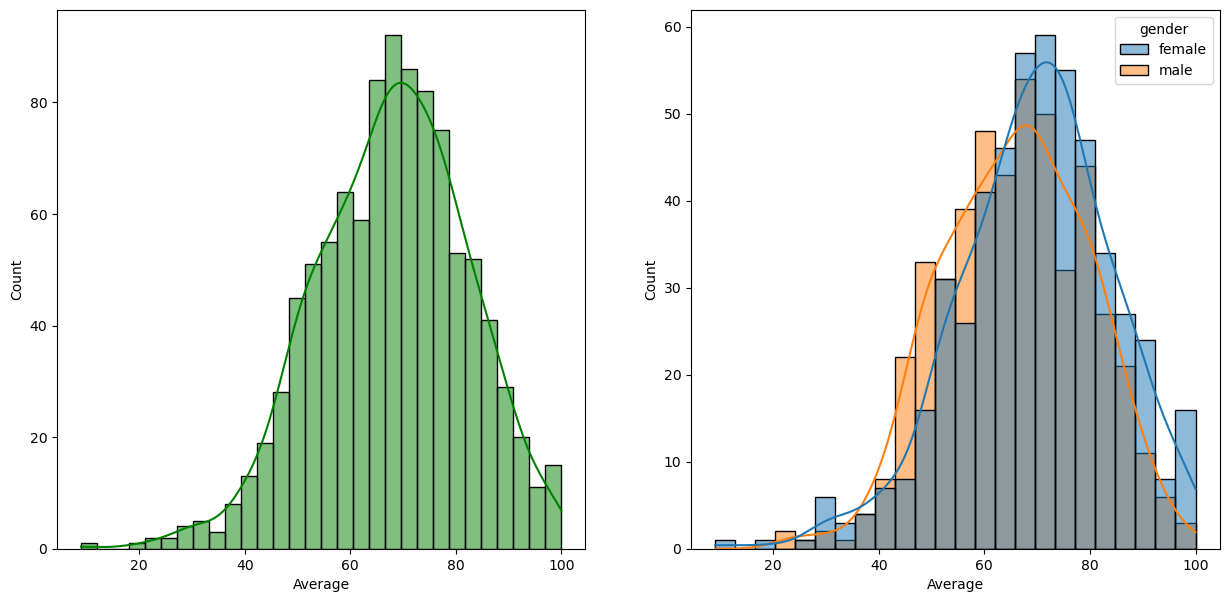

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average',kde=True,hue='gender')
plt.show()

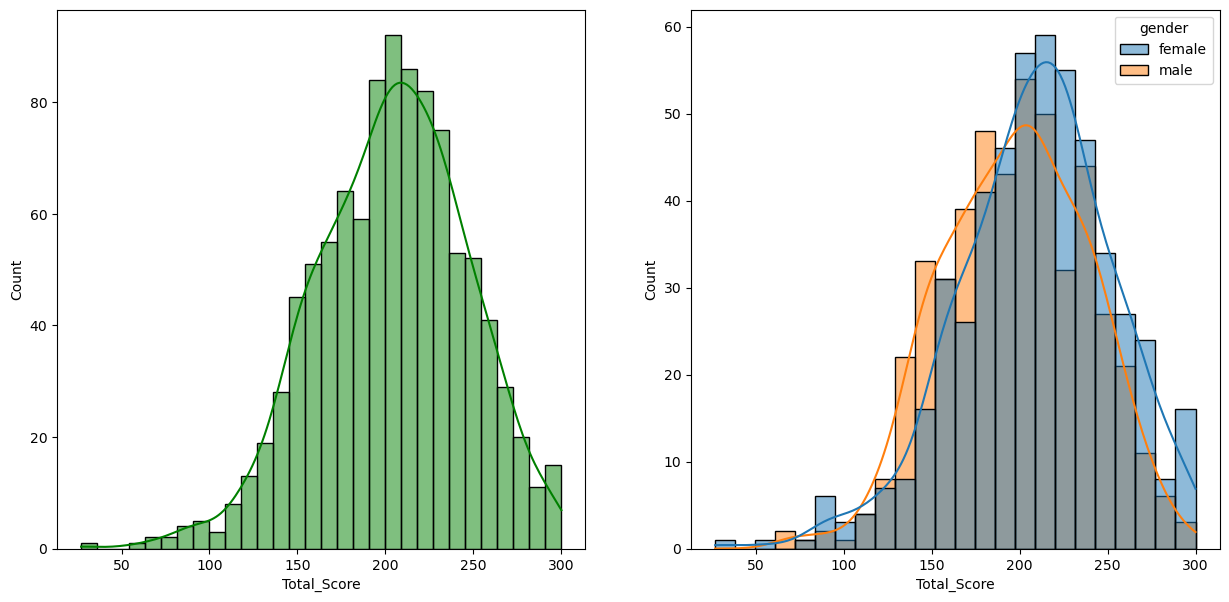

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Total_Score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total_Score',kde=True,hue='gender')
plt.show()

#### 4.1.1 Histogram & KDE

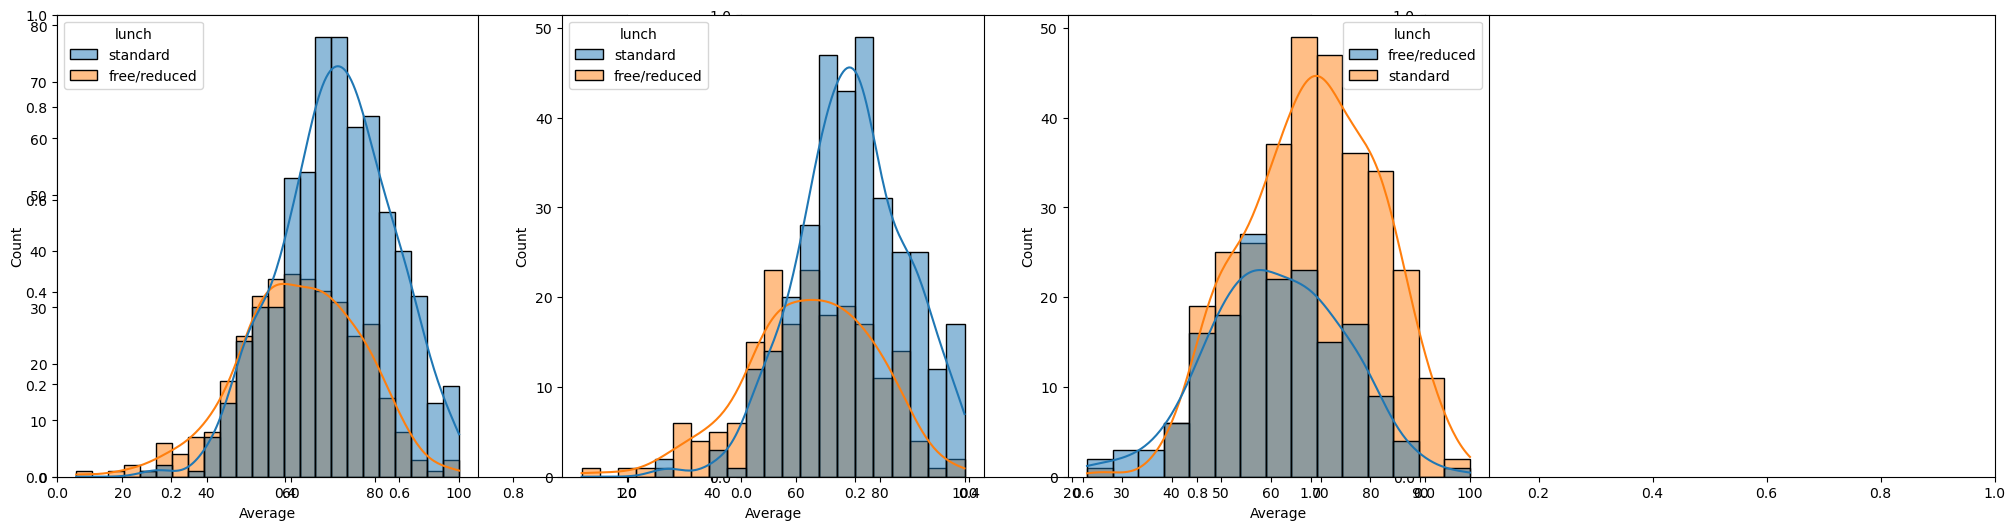

In [16]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='lunch')
plt.show()

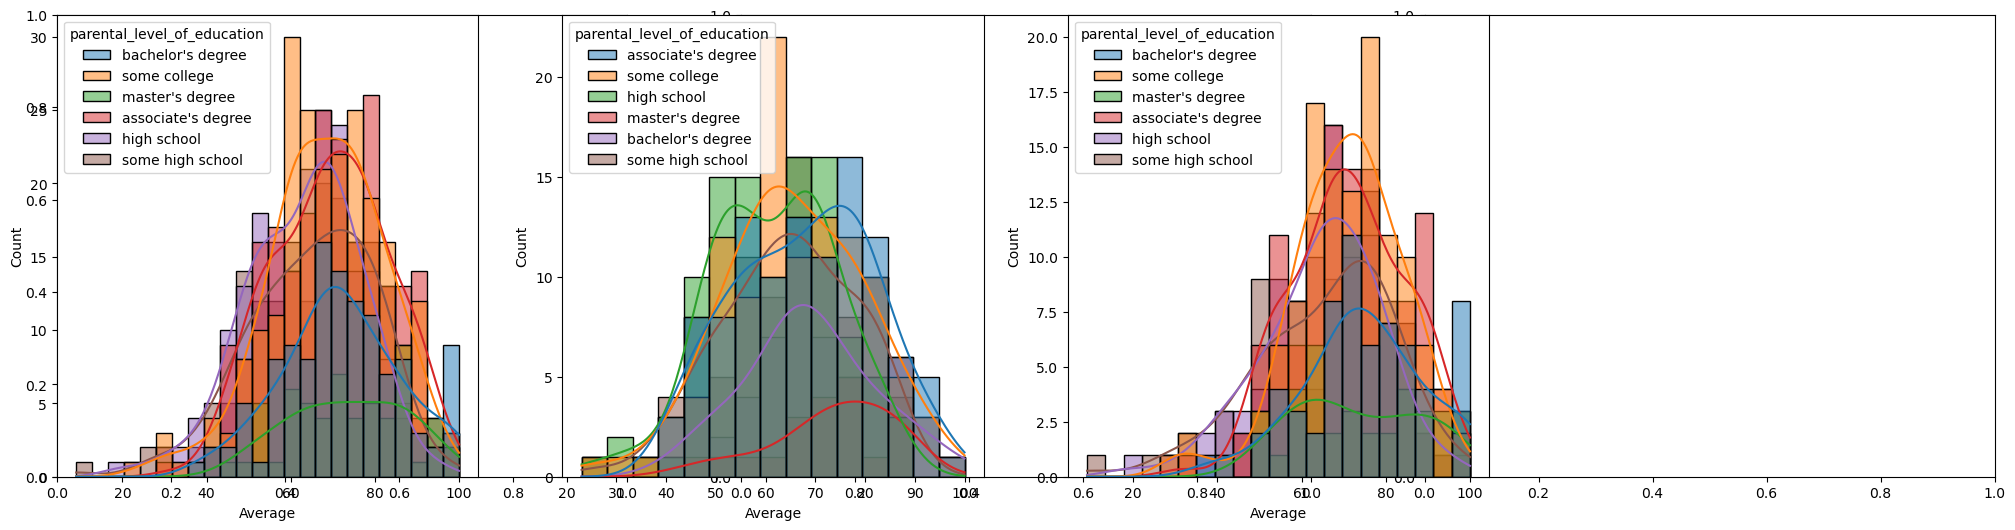

In [17]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='parental_level_of_education')
plt.show()

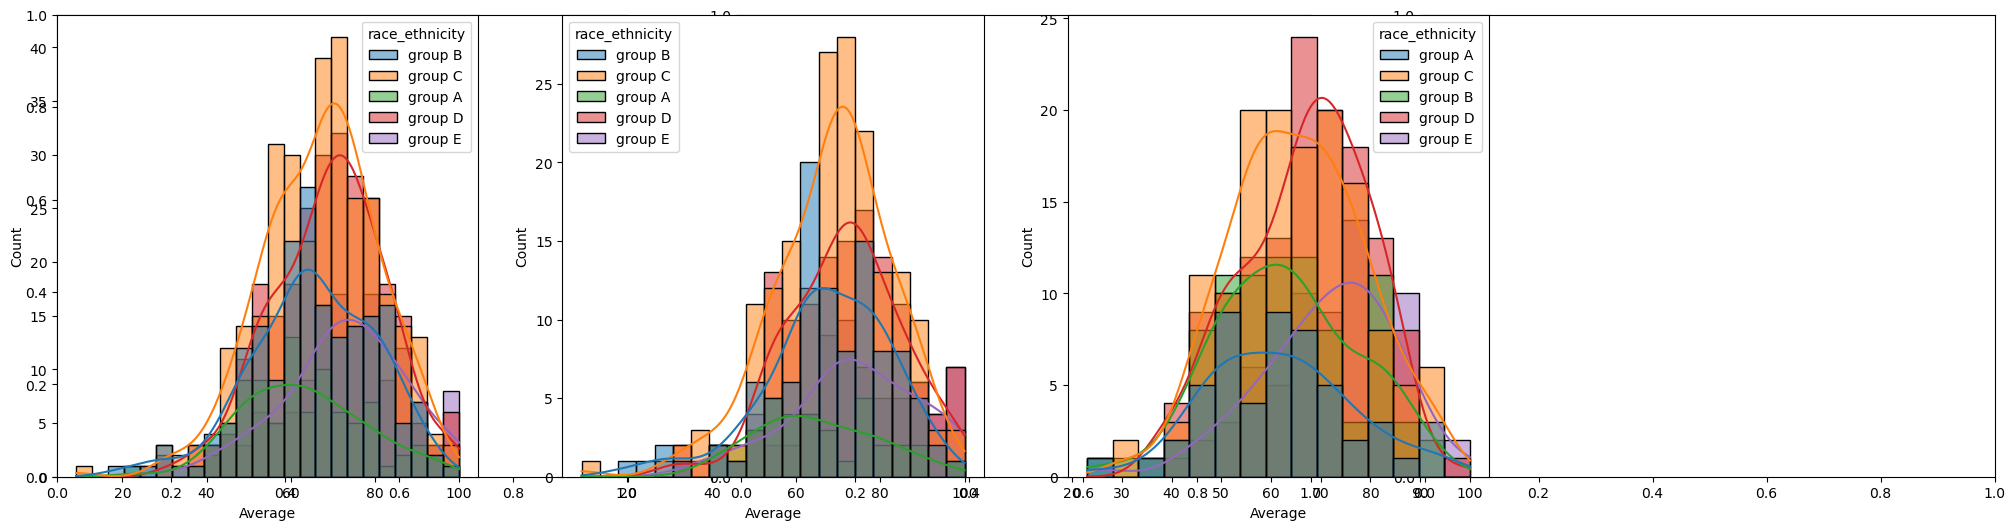

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='race_ethnicity')
plt.show()

#### 4.2 Maximumum score of students in all three subjects

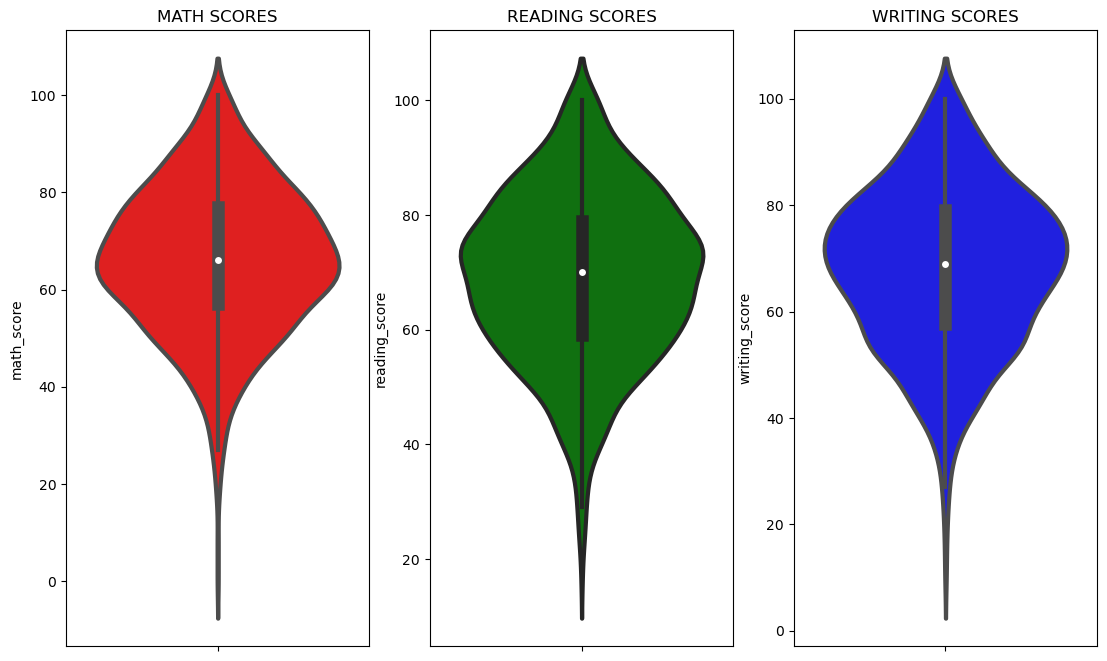

In [19]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

#### 4.3 Multivariate analysis using pieplot

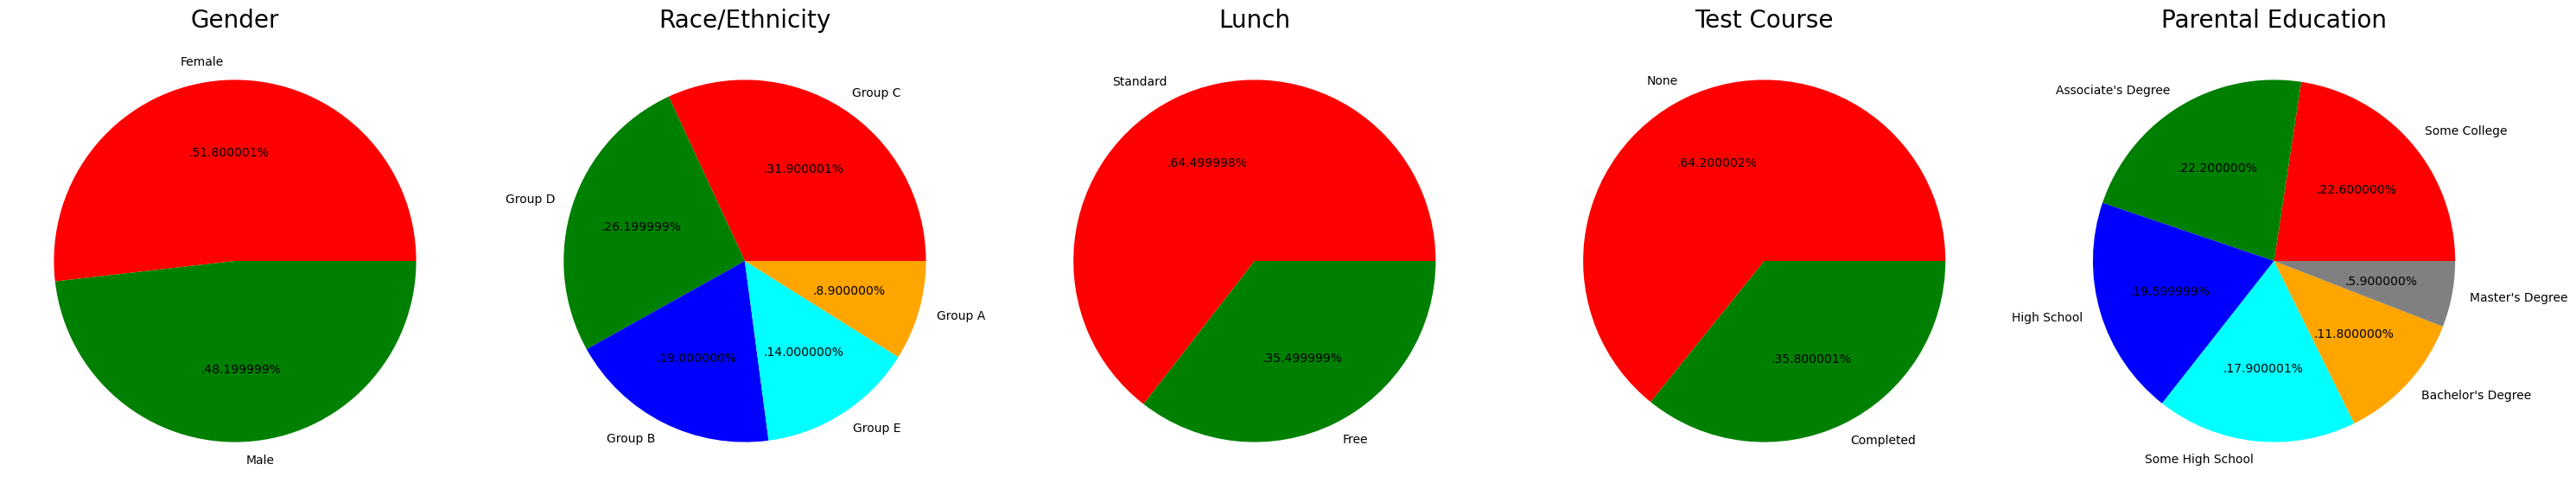

In [20]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#### 4.4 Feature Wise Visualization

#### 4.4.1 GENDER COLUMN

- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

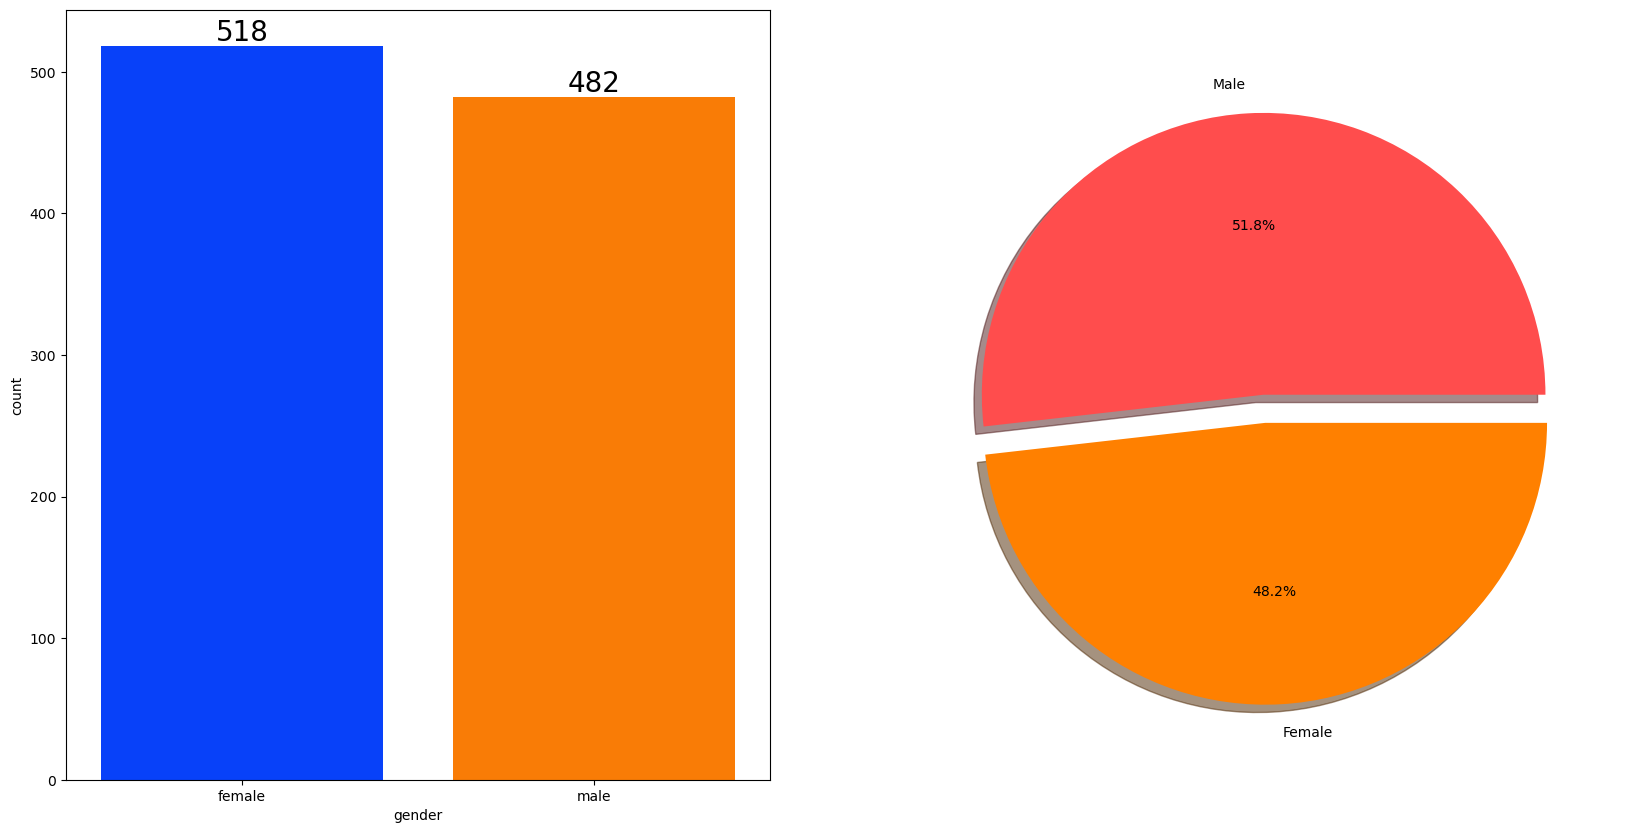

In [21]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Insight - Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

        math_score  reading_score  writing_score  Total_Score    Average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483


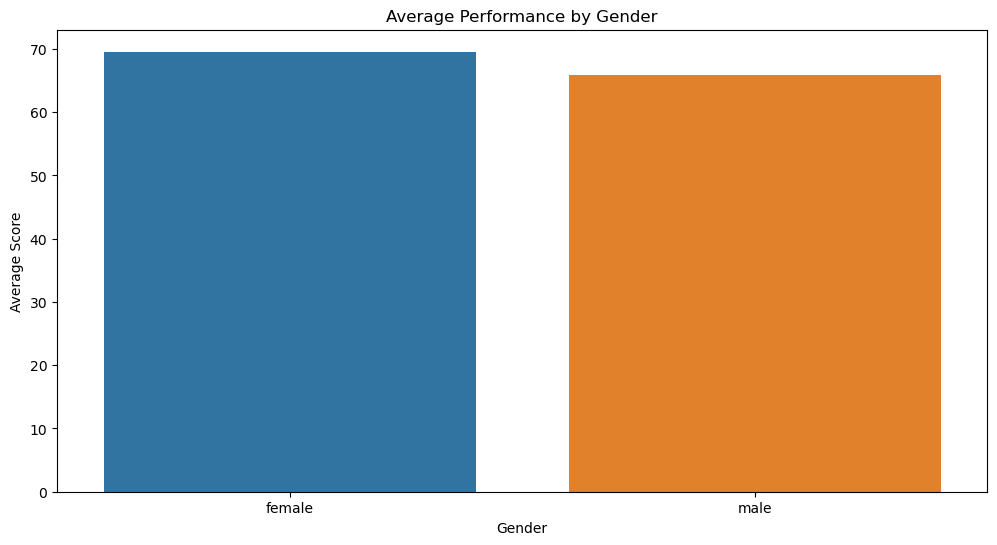

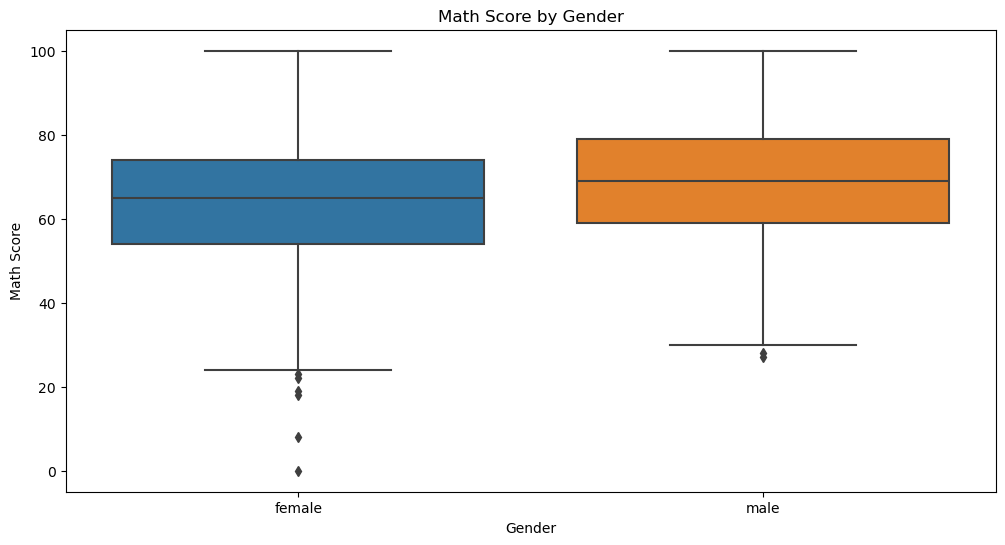

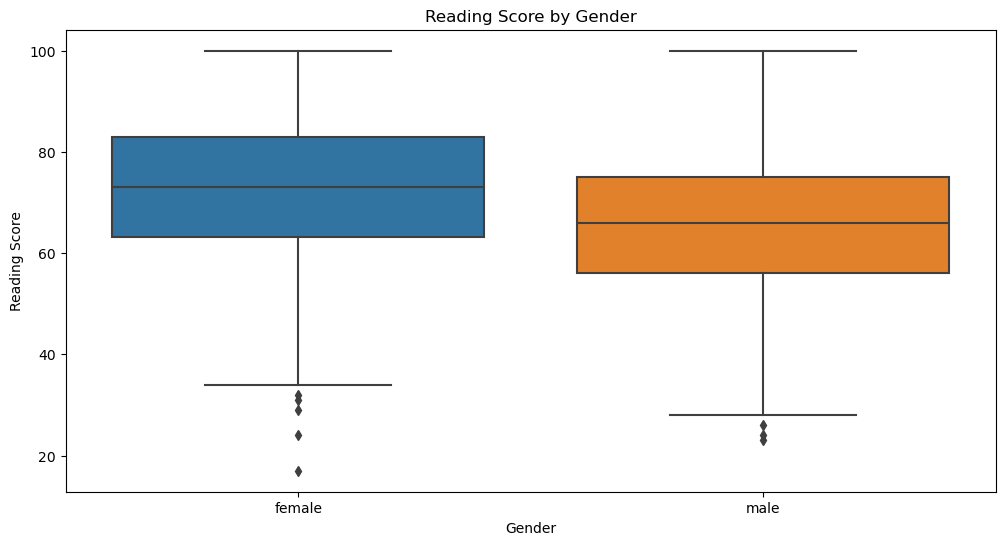

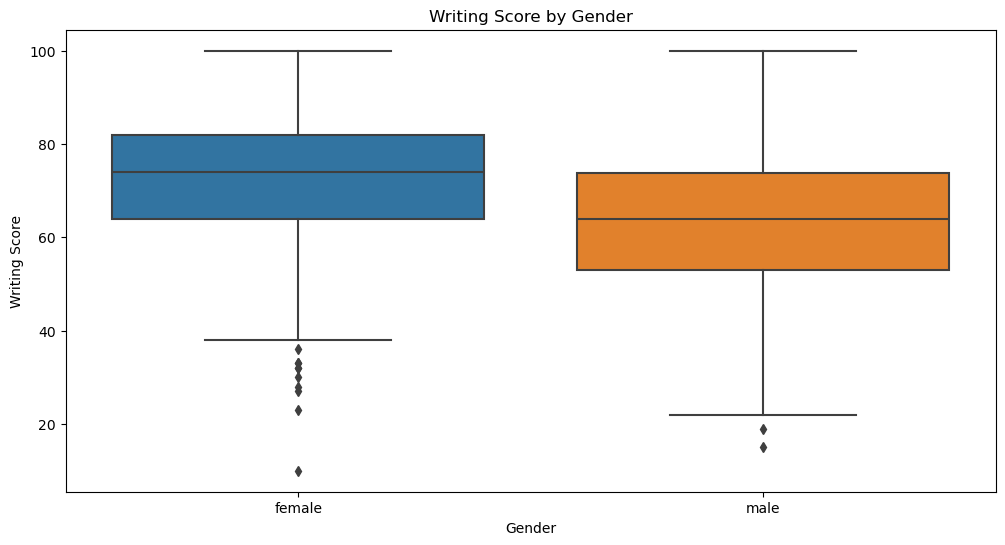

In [22]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include='number').columns

# Group by 'gender' and calculate the mean for each group for numeric columns
gender_group = df.groupby('gender')[numeric_columns].mean()

# Display the result
print(gender_group)

# Plot the average scores for each gender
plt.figure(figsize=(12, 6))
sns.barplot(x=gender_group.index, y=gender_group['Average'], ci=None)
plt.title('Average Performance by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.show()

# Plot individual subjects' scores
subjects = ['math_score', 'reading_score', 'writing_score']
for subject in subjects:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='gender', y=subject, data=df)
    plt.title(f'{subject.replace("_", " ").title()} by Gender')
    plt.xlabel('Gender')
    plt.ylabel(subject.replace("_", " ").title())
    plt.show()


Insight - 
- On an average females have a better overall score than men
- whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN

- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

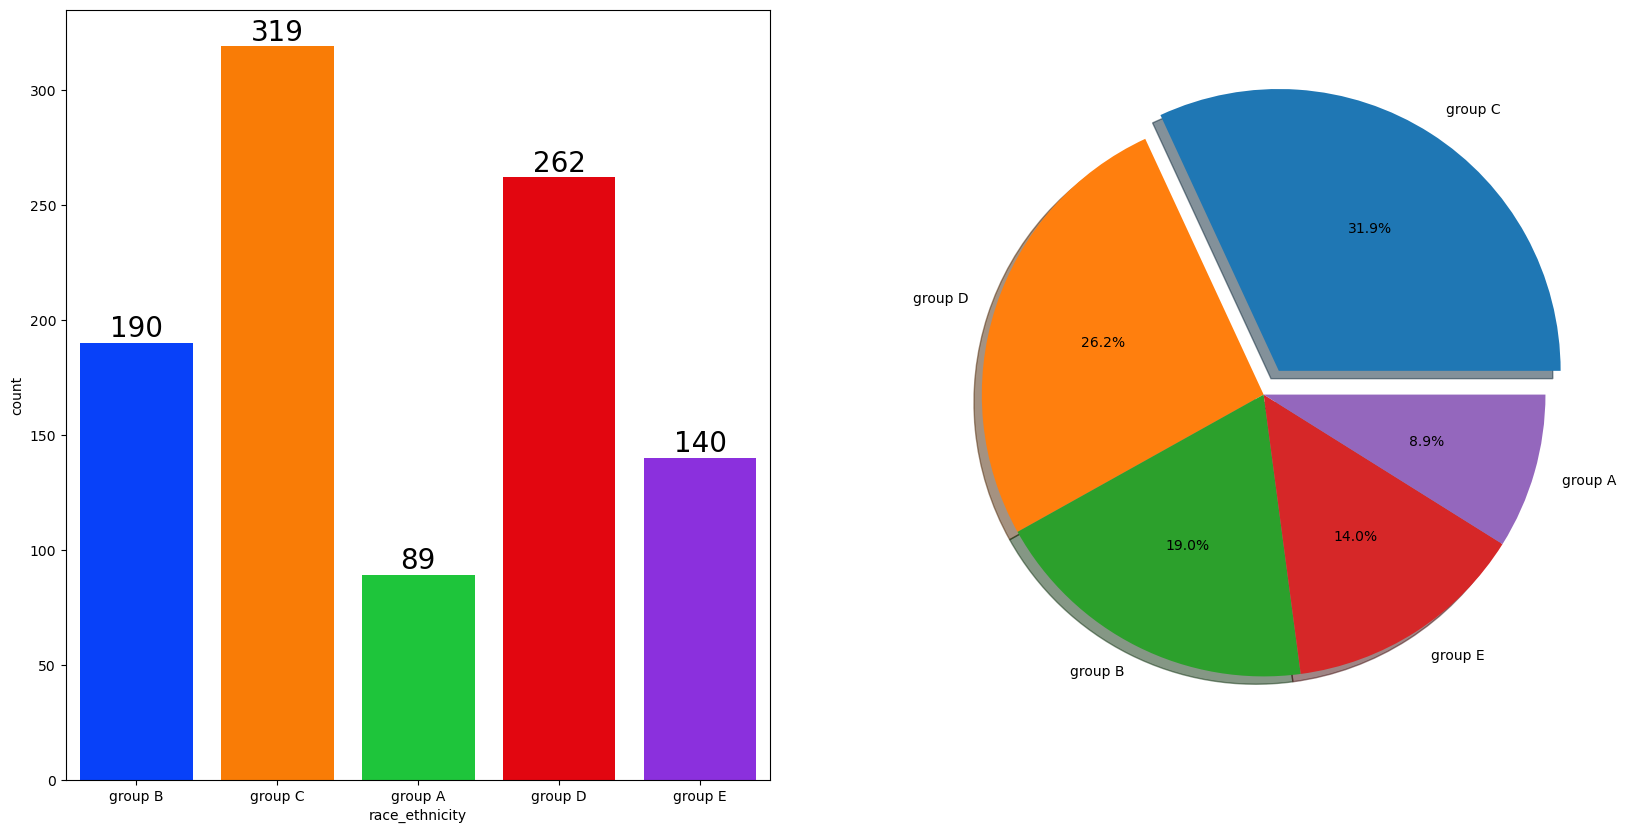

In [23]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

Insights:
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

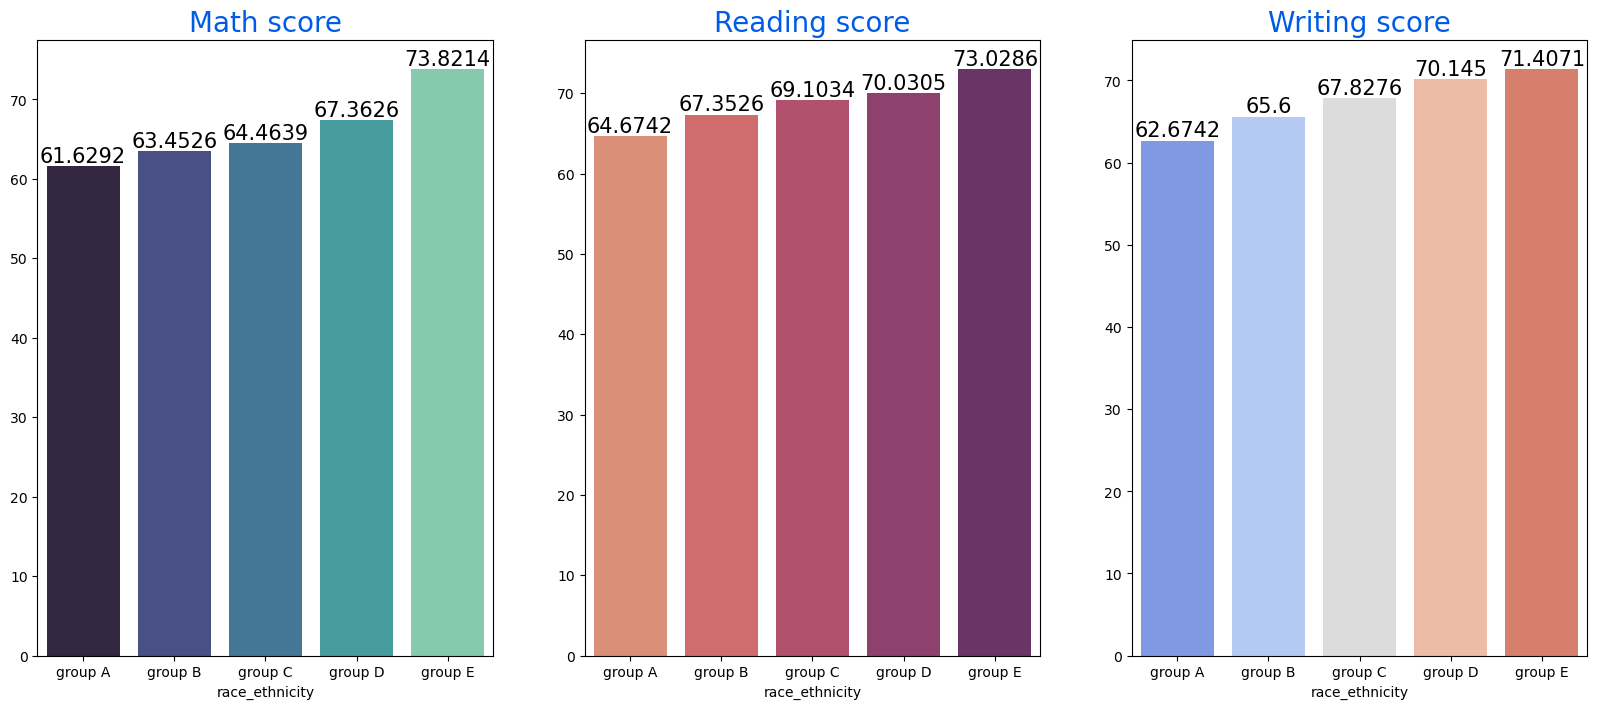

In [24]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Insights:
- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

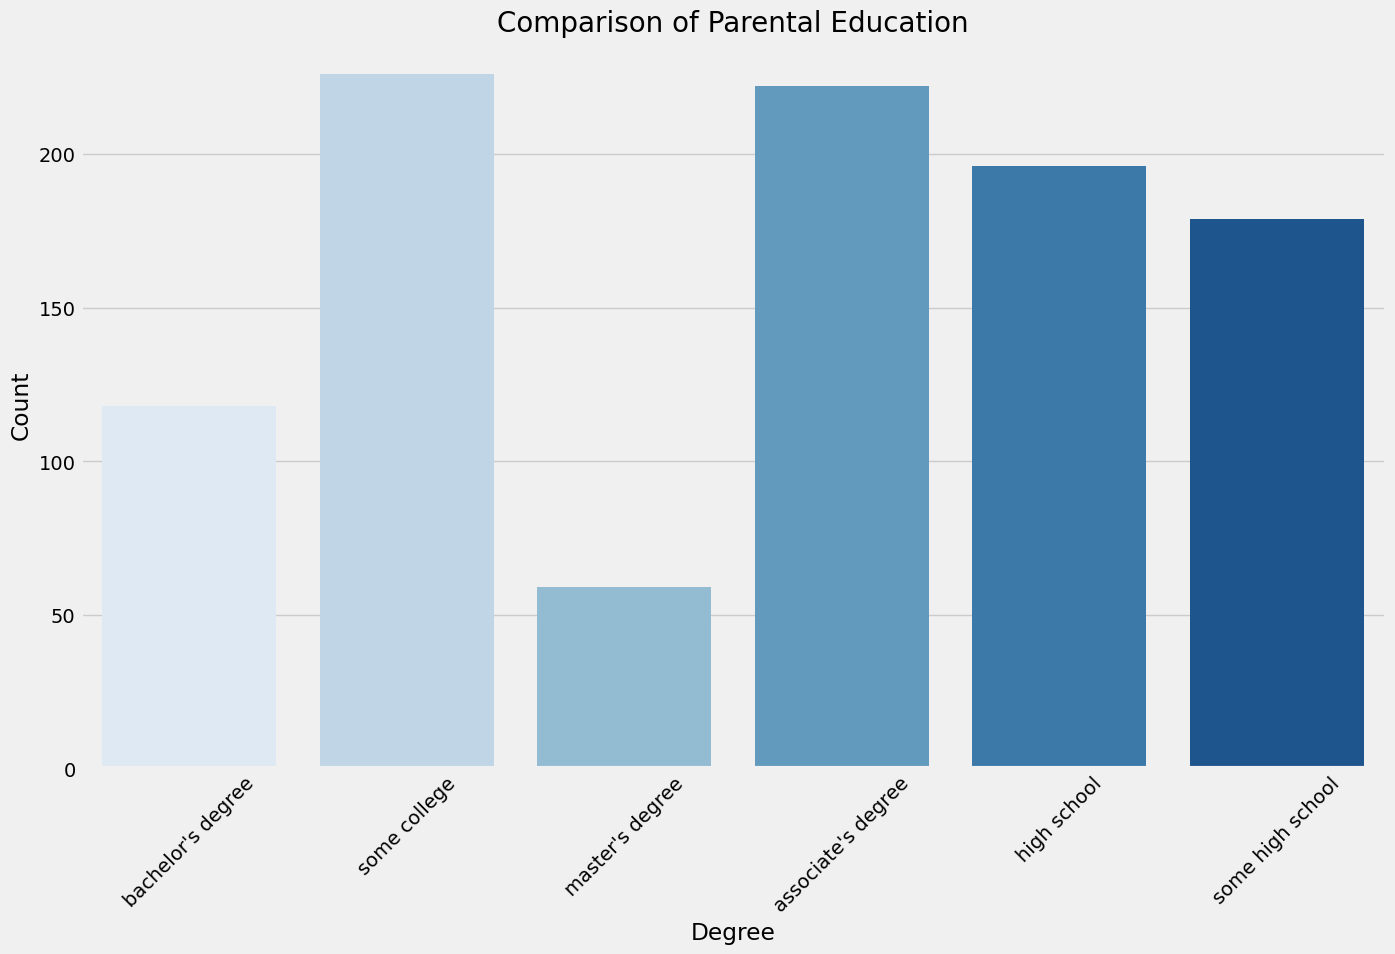

In [25]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

# Corrected countplot call with column name
sns.countplot(x='parental_level_of_education', data=df, palette='Blues')

plt.title('Comparison of Parental Education', fontweight=30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()


Insights:
- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

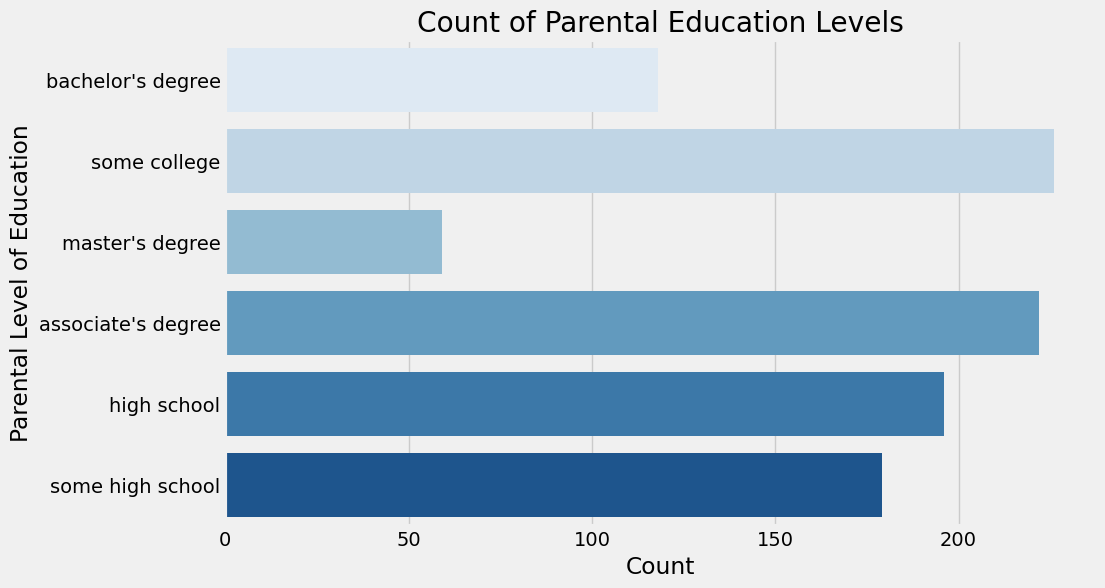

In [26]:
# Countplot of 'parental_level_of_education'
plt.figure(figsize=(10, 6))
sns.countplot(y='parental_level_of_education', data=df, palette='Blues')

plt.title('Count of Parental Education Levels')
plt.xlabel('Count')
plt.ylabel('Parental Level of Education')
plt.show()


Insights:
- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 LUNCH COLUMN

- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

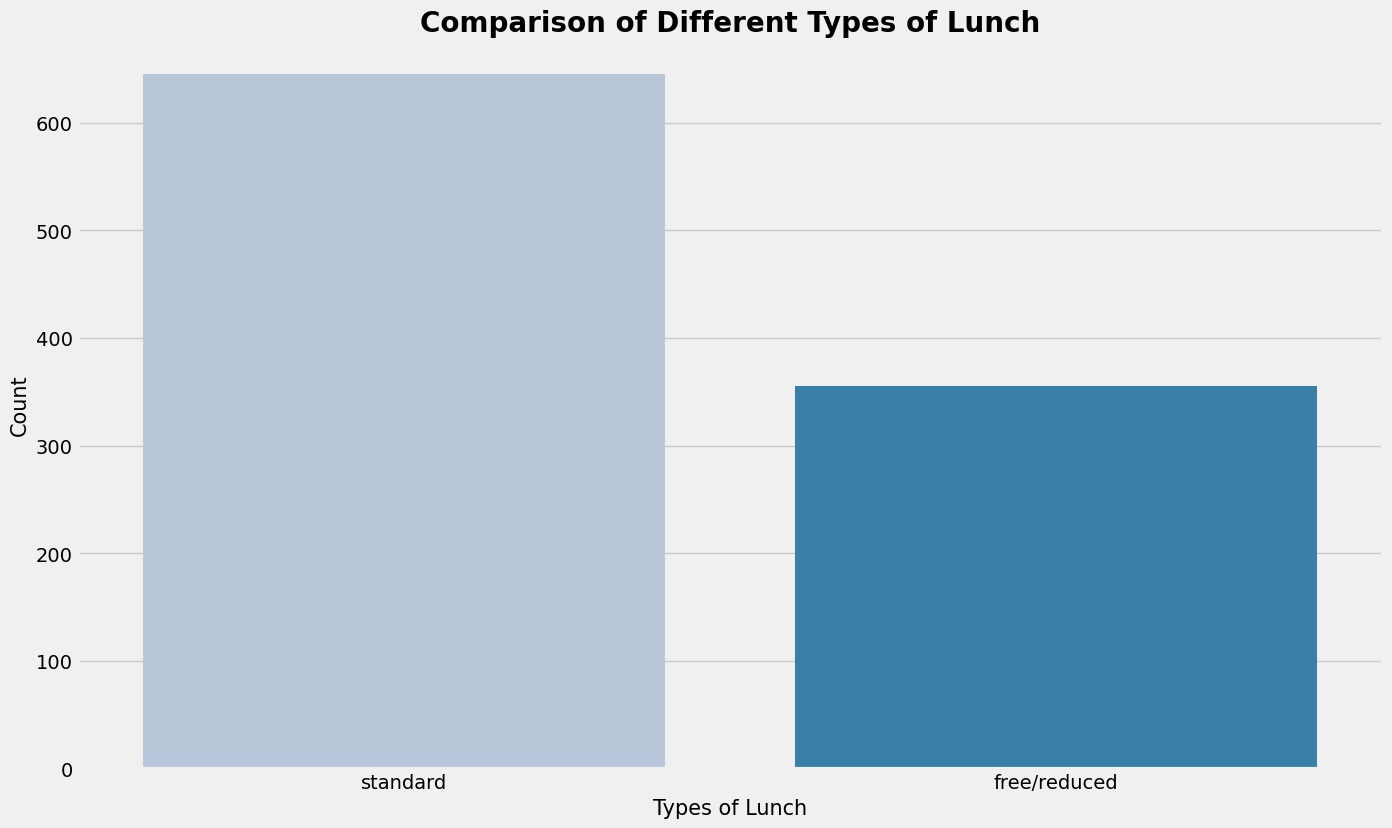

In [27]:
# Set the figure size and style
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

# Create the countplot for 'lunch' column
sns.countplot(x='lunch', data=df, palette='PuBu')

# Add titles and labels
plt.title('Comparison of Different Types of Lunch', fontweight='bold', fontsize=20)
plt.xlabel('Types of Lunch', fontsize=15)
plt.ylabel('Count', fontsize=15)

# Show the plot
plt.show()


Insights:
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

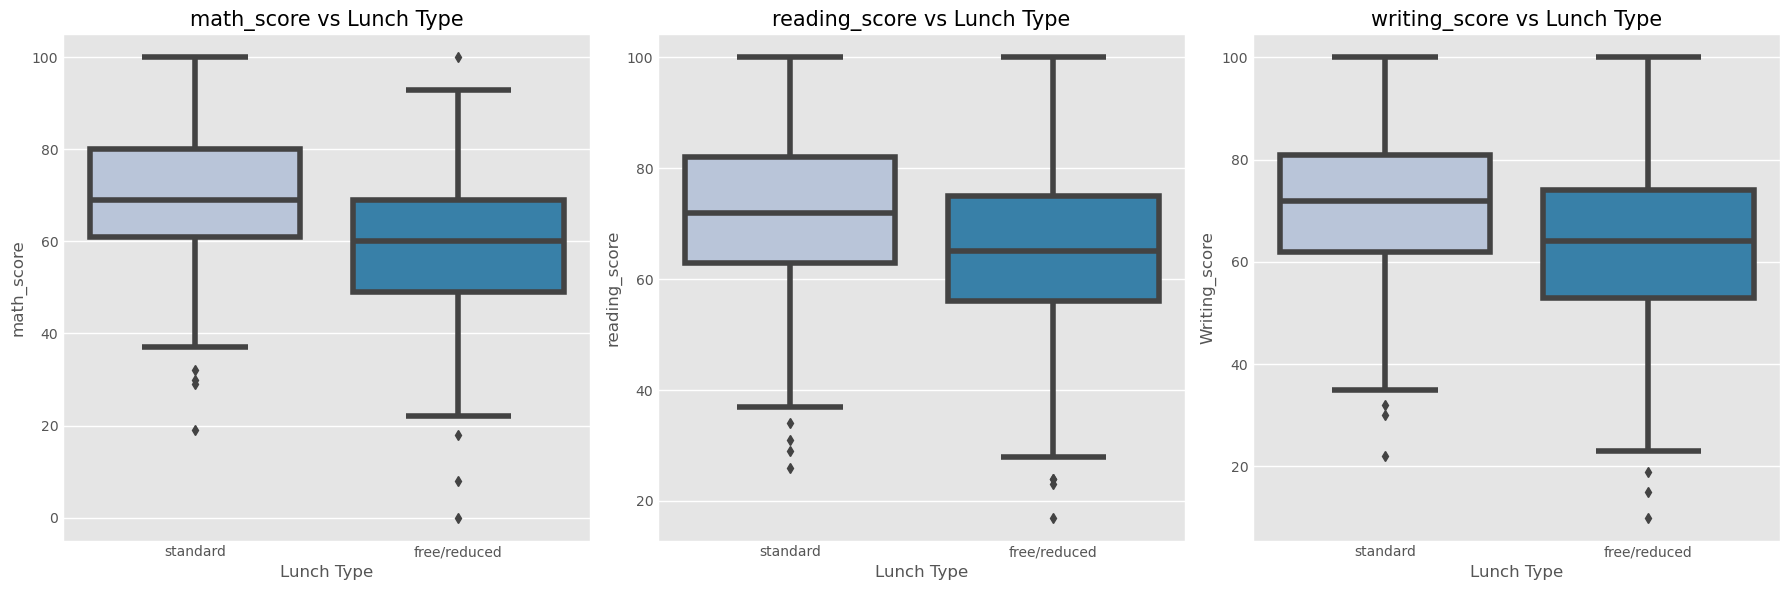

T-Test for Math Scores: p-value = 2.4131955993137074e-30
T-Test for Reading Scores: p-value = 2.0027966545279011e-13
T-Test for Writing Scores: p-value = 3.186189583166477e-15


In [28]:
# Set the figure size and style
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

# Create box plots for each score column
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='lunch', y='math_score', data=df, ax=axes[0], palette='PuBu')
axes[0].set_title('math_score vs Lunch Type', fontsize=15)
axes[0].set_xlabel('Lunch Type', fontsize=12)
axes[0].set_ylabel('math_score', fontsize=12)

sns.boxplot(x='lunch', y='reading_score', data=df, ax=axes[1], palette='PuBu')
axes[1].set_title('reading_score vs Lunch Type', fontsize=15)
axes[1].set_xlabel('Lunch Type', fontsize=12)
axes[1].set_ylabel('reading_score', fontsize=12)

sns.boxplot(x='lunch', y='writing_score', data=df, ax=axes[2], palette='PuBu')
axes[2].set_title('writing_score vs Lunch Type', fontsize=15)
axes[2].set_xlabel('Lunch Type', fontsize=12)
axes[2].set_ylabel('Writing_score', fontsize=12)

plt.tight_layout()
plt.show()

# Group data by lunch type
group1 = df[df['lunch'] == 'standard']
group2 = df[df['lunch'] == 'free/reduced']

# Perform t-tests for each score type
t_test_math = stats.ttest_ind(group1['math_score'], group2['math_score'])
t_test_reading = stats.ttest_ind(group1['reading_score'], group2['reading_score'])
t_test_writing = stats.ttest_ind(group1['writing_score'], group2['writing_score'])

print(f"T-Test for Math Scores: p-value = {t_test_math.pvalue}")
print(f"T-Test for Reading Scores: p-value = {t_test_reading.pvalue}")
print(f"T-Test for Writing Scores: p-value = {t_test_writing.pvalue}")


Insights:
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.5 TEST PREPARATION COURSE COLUMN

- Which type of lunch is most common amoung students ?
- 
Is Test prepration course has any impact on student's performance ?

#### UNIVARIATE ANALYSIS (Distribution of test preparation of the students)

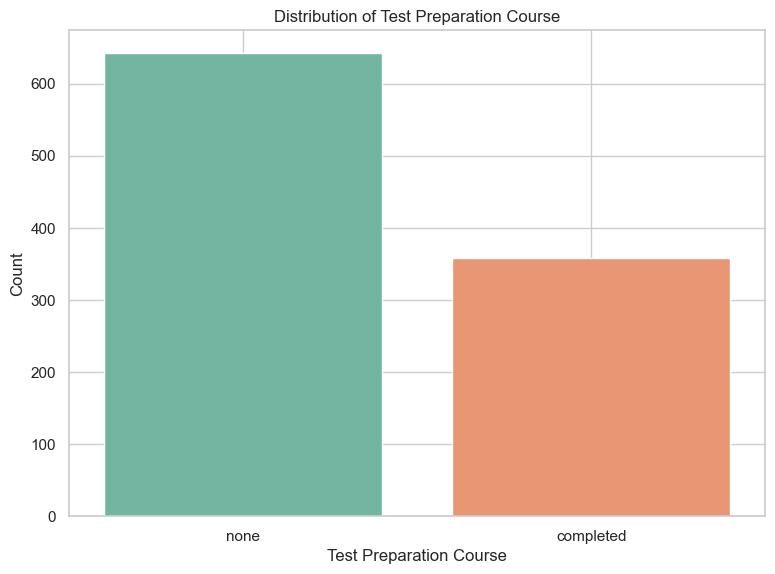

In [29]:
sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(8, 6))
sns.countplot(x='test_preparation_course', data=df, palette="Set2")
plt.title('Distribution of Test Preparation Course')
plt.xlabel('Test Preparation Course')
plt.ylabel('Count')
plt.grid(True)

plt.show()


Insights:
- Majority of students have not completed the test preparation 

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

The most common type of lunch among students is: standard


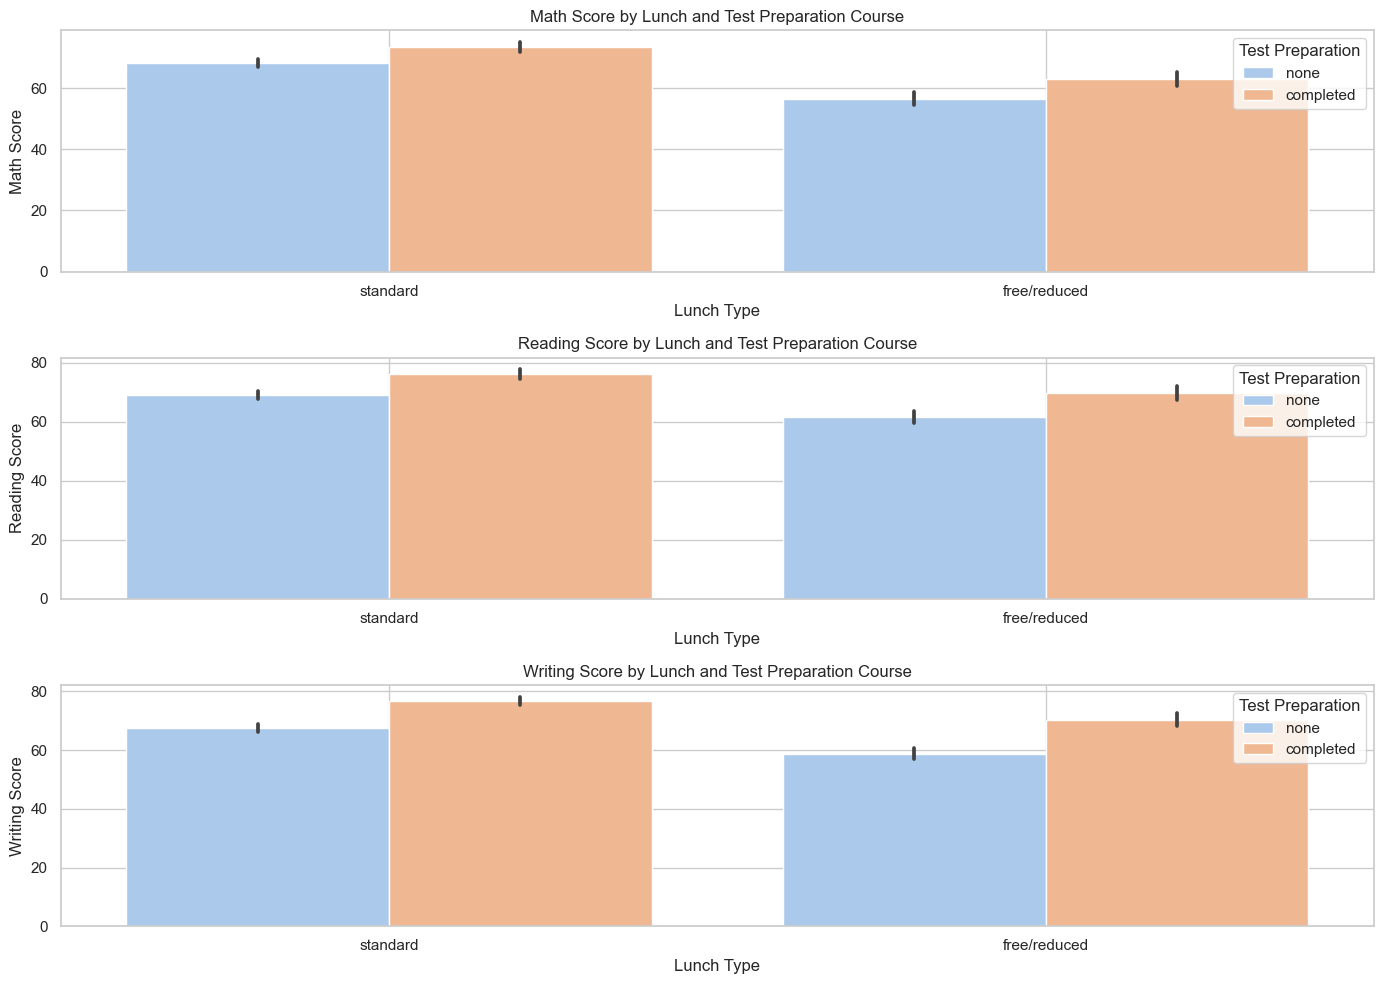

In [30]:
sns.set(style="whitegrid", palette="pastel")

common_lunch = df['lunch'].mode()[0]
print(f"The most common type of lunch among students is: {common_lunch}")

plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
sns.barplot(x='lunch', y='math_score', hue='test_preparation_course', data=df)
plt.title('Math Score by Lunch and Test Preparation Course')
plt.xlabel('Lunch Type')
plt.ylabel('Math Score')
plt.legend(title='Test Preparation', loc='upper right')
plt.grid(True)

plt.subplot(3, 1, 2)
sns.barplot(x='lunch', y='reading_score', hue='test_preparation_course', data=df)
plt.title('Reading Score by Lunch and Test Preparation Course')
plt.xlabel('Lunch Type')
plt.ylabel('Reading Score')
plt.legend(title='Test Preparation', loc='upper right')
plt.grid(True)

plt.subplot(3, 1, 3)
sns.barplot(x='lunch', y='writing_score', hue='test_preparation_course', data=df)
plt.title('Writing Score by Lunch and Test Preparation Course')
plt.xlabel('Lunch Type')
plt.ylabel('Writing Score')
plt.legend(title='Test Preparation', loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()


Insights:
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

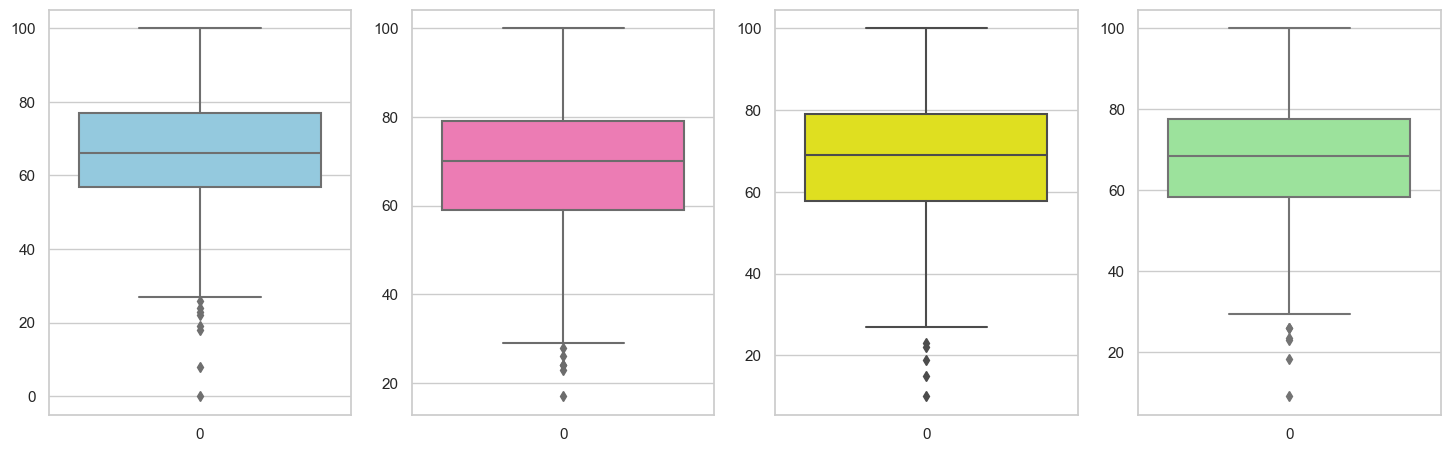

In [31]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average'],color='lightgreen')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

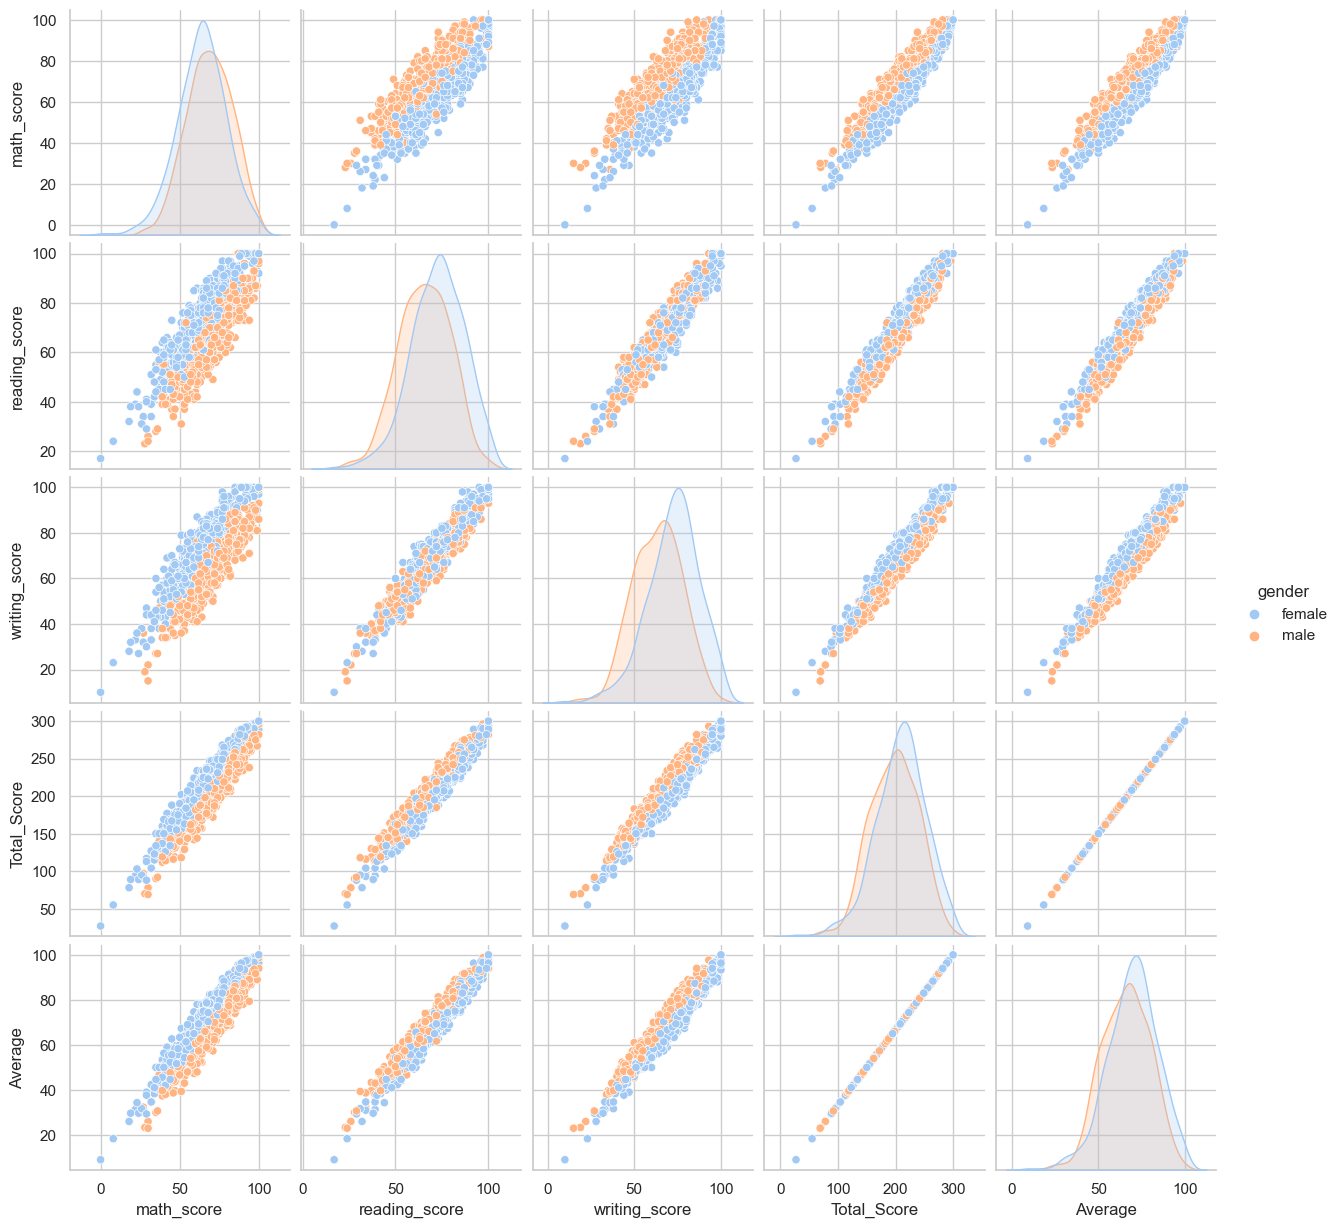

In [32]:
sns.pairplot(df,hue = 'gender')
plt.show()

Insights:
- From the above plot it is clear that all the scores increase linearly with each other.

### 5) Conclusion

- Student's Performance is related with lunch, race_ethnicity and parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.